# Bonus step : Theory cross sections


This notebook makes a plot of the theory cross sections for the coherent J/Psi analysis.

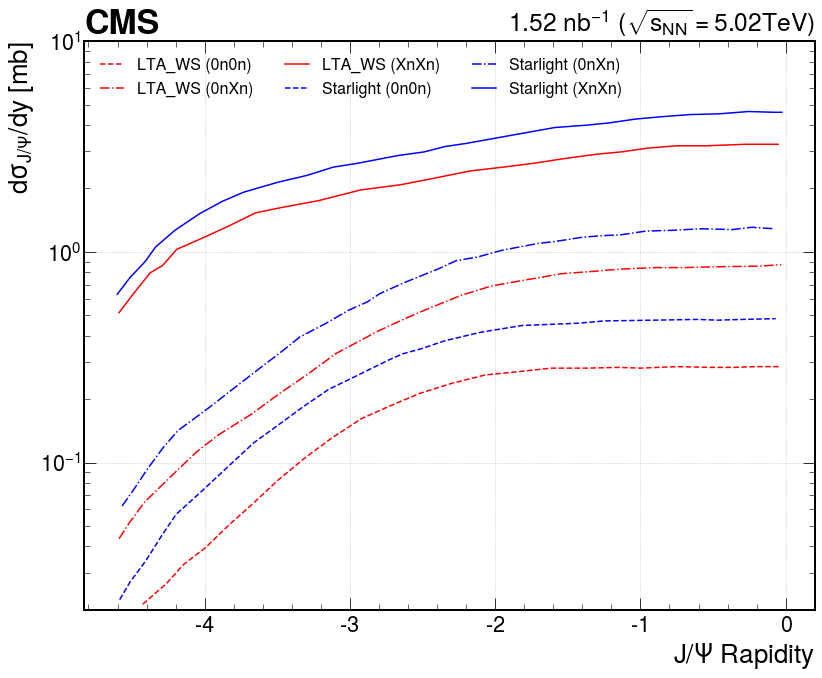

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")
import itertools

theory_dsdy=pd.read_csv('dsigmady_datasets.csv',header='infer',na_values='.')
theory_dsdy.rename(columns={'Unnamed: 1':'LTA_WS_0n0n_y',
                            'Unnamed: 3':'LTA_WS_0nXn_y',
                            'Unnamed: 5':'LTA_WS_XnXn_y',
                            'LTA_WC_XnXn':'LTA_WS_XnXn',
                            'Unnamed: 7':'Starlight_0n0n_y',
                            'Unnamed: 9':'Starlight_0nXn_y',
                            'Unnamed: 11':'Starlight_XnXn_y',
                       },
              inplace=True)
theory_dsdy.drop(index=0,axis=1,inplace=True)
for c in theory_dsdy.columns:
    theory_dsdy[[c]]=theory_dsdy[[c]].apply(pd.to_numeric)


colors={'LTA_WS':'red','Starlight':'blue'}
ls={'0n0n':'--','0nXn':'-.','XnXn':'-'}

fig,ax=plt.subplots(figsize=(12,10))
for c,n in itertools.product(['LTA_WS','Starlight'],['0n0n','0nXn','XnXn']):
    name=f'{c}_{n}'
    x,y=theory_dsdy[name].values,theory_dsdy[name+'_y'].values
    idx=x.argsort()
    x=x[idx]
    y=y[idx]
    ax.plot(x,y,c=colors[c],ls=ls[n],label=f'{c} ({n})')
ax.legend(ncol=3,fontsize=16,loc='upper left')
ax.set_ylim(0.02,10)
ax.grid()
hep.cms.label(loc=0,data=True,rlabel=r'1.52 nb$^{-1}$ ($\sqrt{s_{NN}}=5.02 TeV$)')
ax.set_yscale('log')
ax.set_xlabel(r'$J/\Psi$ Rapidity')
ax.set_ylabel(r'$d\sigma_{J/\Psi}/dy$ [mb]')

fig.tight_layout()
plt.show()